In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\usajjad\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("./housing-v1.csv")

# EDA

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,NaN,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
502,0.04527,0.0,11.93,0.000,0.573,6.120,76.7000,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.000,0.573,6.976,91.0000,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.000,0.573,6.794,89.3000,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.000,0.573,6.030,80.8000,2.5050,1,273.0,21.0,396.90,7.88,11.9
506,0.00000,NaN,0.00,0.614,6.229,NaN,1.9512,NaN,666,20.2,NaN,13.11,21.40,NaN


In [5]:
##CHECKING THE SHAPE OF THE DATASET
df.shape

(507, 14)

In [6]:
##CHECKING THE COLUMNS NAMES
col = df.columns
col

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
#Describe different properties of dataset attributes
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,507.000000,505.000000,507.000000,507.000000,506.000000,506.000000,507.000000,505.000000,507.000000,507.000000,506.000000,506.000000,507.000000,452.000000
mean,1.266692,13.296832,9.187002,0.141698,1.112580,15.679800,58.632641,6.173749,79.222880,338.688363,42.614980,332.041285,11.557258,23.750442
std,2.397498,23.071524,7.174199,0.313162,1.662437,27.220206,33.167367,6.482849,205.010555,181.047031,87.585243,126.097020,6.074746,8.808602
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000,6.300000
25%,0.048755,0.000000,3.440000,0.000000,0.449000,5.961500,31.950000,2.429800,4.000000,254.000000,17.000000,364.385000,6.885000,18.500000
50%,0.144550,0.000000,6.960000,0.000000,0.538000,6.322500,65.200000,3.917500,5.000000,307.000000,18.900000,390.595000,10.400000,21.950000
75%,0.813985,18.100000,18.100000,0.000000,0.647000,6.949000,89.950000,6.336100,24.000000,403.000000,20.200000,395.615000,15.025000,26.600000
max,9.966540,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000,50.000000


In [8]:
#Show different types of dset
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [9]:
#Show the Info of dataframe
df.info

<bound method DataFrame.info of         CRIM    ZN  INDUS   CHAS    NOX     RM      AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31  0.000  0.538  6.575  65.2000  4.0900    1  296.0   
1    0.02731   0.0   7.07  0.000  0.469  6.421  78.9000  4.9671    2  242.0   
2    0.02729   0.0   7.07  0.000  0.469  7.185  61.1000  4.9671    2  242.0   
3    0.03237   0.0   2.18  0.000  0.458  6.998  45.8000  6.0622    3  222.0   
4    0.06905   0.0   2.18  0.000    NaN  7.147  54.2000  6.0622    3  222.0   
..       ...   ...    ...    ...    ...    ...      ...     ...  ...    ...   
502  0.04527   0.0  11.93  0.000  0.573  6.120  76.7000  2.2875    1  273.0   
503  0.06076   0.0  11.93  0.000  0.573  6.976  91.0000  2.1675    1  273.0   
504  0.10959   0.0  11.93  0.000  0.573  6.794  89.3000  2.3889    1  273.0   
505  0.04741   0.0  11.93  0.000  0.573  6.030  80.8000  2.5050    1  273.0   
506  0.00000   NaN   0.00  0.614  6.229    NaN   1.9512     NaN  666   20.2   

     PTRATIO       

In [10]:
#Show Unique Value in DF
df.nunique()

CRIM       452
ZN          27
INDUS       77
CHAS        16
NOX        132
RM         437
AGE        399
DIS        360
RAD         10
TAX         67
PTRATIO     85
B          373
LSTAT      445
MEDV       210
dtype: int64

In [11]:
##CHECKING DUPLICATE
df.duplicated().sum()

0

In [12]:
##CHECKING MISSING VALUES
df.isna().sum()

CRIM        0
ZN          2
INDUS       0
CHAS        0
NOX         1
RM          1
AGE         0
DIS         2
RAD         0
TAX         0
PTRATIO     1
B           1
LSTAT       0
MEDV       55
dtype: int64

In [29]:
#Remove rows with more than 4 missing values
indexesWithMissingRows = np.argwhere(df.isna().sum(1).to_numpy() >= 5).reshape(-1)
df = df.drop(indexesWithMissingRows)

In [30]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [31]:
##SET THE VALUES
df["MEDV"] = df["MEDV"].fillna(df["MEDV"].median())

df["B"] = df["B"].fillna(df["B"].median())
df["ZN"] = df["ZN"].fillna(df["ZN"].median())
df["DIS"] = df["DIS"].fillna(df["DIS"].median())
df["NOX"] = df["NOX"].fillna(df["NOX"].median())

In [32]:
##CHECKING THE DTYPES DETAIL WISE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    int32  
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    int32  
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int32  
 9   TAX      506 non-null    int32  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int32(4)
memory usage: 47.6 KB


In [33]:
# CONVERT TYPE
df["AGE"] = df["AGE"].astype(int)
df["ZN"] = df["ZN"].astype(int)
df["RAD"] = df["RAD"].astype(int)
df["TAX"] = df["TAX"].astype(int)

In [34]:
##STATISTICAL SUMMARY OF THE DATASET
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,1.269195,2.399207,0.0000,0.049443,0.144655,0.819623,9.96654
ZN,506.0,13.245059,23.043292,0.0000,0.000000,0.000000,18.000000,100.00000
INDUS,506.0,9.205158,7.169630,0.0000,3.440000,6.960000,18.100000,27.74000
CHAS,506.0,0.140765,0.312765,0.0000,0.000000,0.000000,0.000000,1.00000
NOX,506.0,1.101333,1.646933,0.3850,0.449000,0.538000,0.647000,7.31300
RM,506.0,15.679800,27.220206,3.5610,5.961500,6.322500,6.949000,100.00000
AGE,506.0,58.292490,33.154087,1.0000,32.000000,65.000000,89.750000,100.00000
DIS,506.0,6.169290,6.477204,1.1296,2.430575,3.917500,6.332075,24.00000
RAD,506.0,78.063241,203.542157,1.0000,4.000000,5.000000,24.000000,666.00000
TAX,506.0,339.296443,180.707858,20.0000,254.000000,307.000000,403.000000,711.00000


In [36]:
target = 'MEDV'
threshold = 0

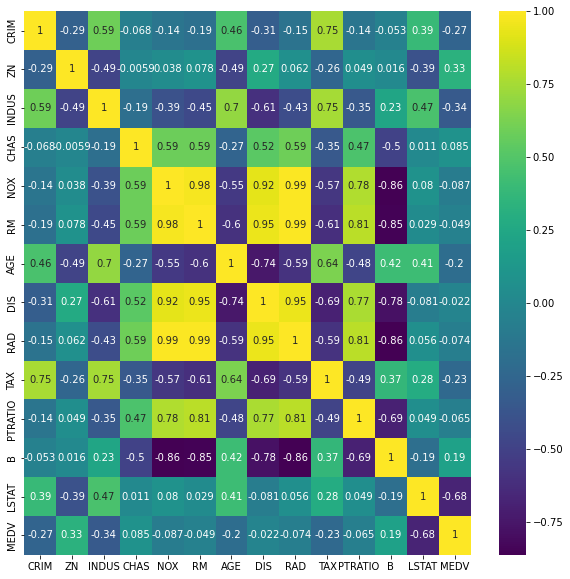

In [37]:
##FEATURE SLECTION
corr_ranking = (
df
.drop(target, axis=1)
.corrwith(df[target])
.abs()
.sort_values(ascending=False)
)

plt.figure(figsize=(10,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.show()

In [21]:
# Show the correlation ranking of the attributes
corr_ranking

LSTAT      0.679044
INDUS      0.338593
ZN         0.325585
CRIM       0.268576
TAX        0.232352
AGE        0.200378
B          0.193697
NOX        0.087259
CHAS       0.085446
RAD        0.074271
PTRATIO    0.064664
RM         0.049154
DIS        0.021535
dtype: float64

In [38]:
# Filter the cols using the threshold

cols = corr_ranking[corr_ranking>=threshold]
cols = cols.index.to_list()

X = df[cols]
y = df[target]

print(cols)

['LSTAT', 'INDUS', 'ZN', 'CRIM', 'TAX', 'AGE', 'B', 'NOX', 'CHAS', 'RAD', 'PTRATIO', 'RM', 'DIS']


In [39]:
#Divide the dataset into train, test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
scaler = StandardScaler()
cols = X_train.select_dtypes([float, int]).columns.to_list()
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test)

In [41]:
linear_reg_params = {
'fit_intercept': [True, False],
}

In [43]:
# Run the linear Regression Model

b_models = []
model_results = []

params =  {'fit_intercept': True}
model = LinearRegression()
model.fit(X_train, y_train)
b_models.append(model)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
model_name = "Linear Regression Model"
results = pd.Series({'MSE': mse, 'RMSE': rmse, 'R2': r2}, name=model_name)
model_results.append(results)

In [45]:
# Show the MSE, RMSE, R_Square
pd.concat(model_results, axis=1)

,Linear Regression Model
MSE,32.381081
RMSE,5.690438
R2,0.508117


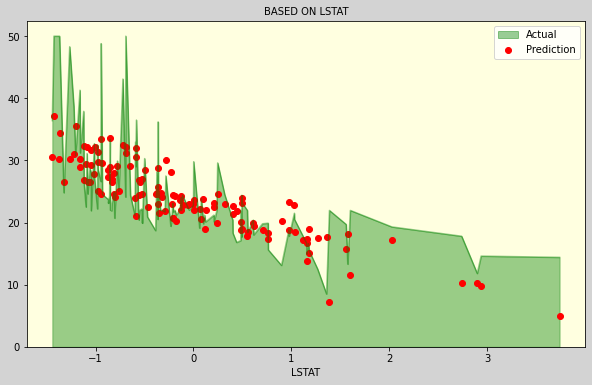

In [46]:
# Plot the graph, 
# Exercise: Tweak the col variable, set the different columns, and see how chart changes.

xgb_model = b_models[0]
col = 'LSTAT'
y_pred = xgb_model.predict(X_test.sort_values(by=col))
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('lightgray')

(
pd.concat([X_test[col], y_test], axis=1)
.sort_values(by=col)
.plot.area(x=col, y='MEDV', color='green', alpha=0.4, label='Actual', ax=ax)
)

plt.scatter(X_test[col].sort_values(), y_pred, color='red', label='Prediction')
plt.legend()
plt.title("BASED ON LSTAT", size=10)
ax.set_facecolor('lightyellow')
plt.show()